In [1]:
#this is a practice notebook for some basic machine learning algorithms 

In [1]:
#this cell is for classifying Male VS Female
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#height, weight, shoe_size
X = [[181, 80, 44], [177, 70, 43], [160, 60, 38], [154, 54, 37], [166, 65, 40],
     [190, 90, 47], [175, 64, 39],[177, 70, 40], [159, 55, 37], [171, 75, 42], [181, 85, 43], [155, 65,38]]

#labels
y = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female',
     'female', 'male', 'male', 'female']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



algorithms = [DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression()]

for algorithm in algorithms:
    clf = algorithm
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(y_pred)
    print('Accuracy: ', len([x for x in y_pred if x in y_test])/len(y_test))



['male' 'male' 'male']
Accuracy:  1.0
['male' 'female' 'male']
Accuracy:  0.6666666666666666
['female' 'female' 'female']
Accuracy:  0.0
['male' 'male' 'male']
Accuracy:  1.0


C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
#recommender system using python
import numpy as np
from lightfm.datasets import fetch_movielens
from lightfm import LightFM

#fetch data and format it 
data = fetch_movielens(min_rating=4.0)

#print training and testign data 
print(repr(data['train']))
print(repr(data['test']))


model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

def sample_recommendation(model, data, user_ids):
    n_users, n_items = data['train'].shape
    
    for user_id in user_ids:
        known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]
        
        scores = model.predict(user_id, np.arange(n_items))
        
        top_items = data['item_labels'][np.argsort(-scores)]
        
        #print results
        print("User: ", user_id)
        print("known positives")
        
        for x in known_positives[:3]:
            print(x)
        
        print("Recommeneded")
        
        for x in top_items[:3]:
            print(x)

sample_recommendation(model, data, [10])

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 49906 stored elements in COOrdinate format>
<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 5469 stored elements in COOrdinate format>
User:  10
known positives
Babe (1995)
Dead Man Walking (1995)
Mr. Holland's Opus (1995)
Recommeneded
Star Wars (1977)
Return of the Jedi (1983)
E.T. the Extra-Terrestrial (1982)


In [27]:
np.arange(16470)

array([    0,     1,     2, ..., 16467, 16468, 16469])

In [52]:
#gradient descent algorithm from Siraj Raval's video

#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...") 
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))) 
    

run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


In [53]:
points

[[1, 1], [2, 2], [7, 7], [8, 8]]

In [7]:
#my own implementation
def step_gradient(b_current, m_current, points, learningRate):
    
    m = m_current 
    b = b_current
    print('input m: ', m, 'input b: ', b)
    
    for point in points:
        point = list(point)
        x,y = point[0], point[1]
        y_guess = m*x + b

        error = y - y_guess

        m = m + error*x*learning_rate #derivative relative to m
        b = b + error*learning_rate #derivative relative to b

    print('output m: ', m, 'output b: ', b,'\n')
    return [b,m]
    

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        
        b, m = step_gradient(b, m, points, learning_rate)
        
        
    return [b, m]

In [10]:
points = genfromtxt("data.csv", delimiter=",")
starting_b = 0
starting_m = 0
learning_rate = 0.0001
num_iterations = 1000
b,m = gradient_descent_runner(points, starting_b,starting_m,learning_rate,num_iterations)

input m:  0 input b:  0
output m:  1.5785046049371114 output b:  0.03369039016126796 

input m:  1.5785046049371114 input b:  0.03369039016126796
output m:  1.578446829202065 output b:  0.036513050406993645 

input m:  1.578446829202065 input b:  0.036513050406993645
output m:  1.578389076104437 output b:  0.03933460467944234 

input m:  1.578389076104437 input b:  0.03933460467944234
output m:  1.5783313456355976 output b:  0.042155053411960734 

input m:  1.5783313456355976 input b:  0.042155053411960734
output m:  1.5782736377866808 output b:  0.0449743970377208 

input m:  1.5782736377866808 input b:  0.0449743970377208
output m:  1.5782159525488233 output b:  0.0477926359897249 

input m:  1.5782159525488233 input b:  0.0477926359897249
output m:  1.5781582899131656 output b:  0.050609770700805766 

input m:  1.5781582899131656 input b:  0.050609770700805766
output m:  1.578100649870852 output b:  0.05342580160362649 

input m:  1.578100649870852 input b:  0.05342580160362649
outp


input m:  1.5640635987477436 input b:  0.7392124207750804
output m:  1.5640114812800063 output b:  0.7417586437449982 

input m:  1.5640114812800063 input b:  0.7417586437449982
output m:  1.5639593842329076 output b:  0.7443038690551538 

input m:  1.5639593842329076 input b:  0.7443038690551538
output m:  1.563907307598447 output b:  0.7468480970964496 

input m:  1.563907307598447 input b:  0.7468480970964496
output m:  1.5638552513686264 output b:  0.7493913282596352 

input m:  1.5638552513686264 input b:  0.7493913282596352
output m:  1.5638032155354509 output b:  0.7519335629353064 

input m:  1.5638032155354509 input b:  0.7519335629353064
output m:  1.5637512000909282 output b:  0.7544748015139062 

input m:  1.5637512000909282 input b:  0.7544748015139062
output m:  1.5636992050270704 output b:  0.7570150443857256 

input m:  1.5636992050270704 input b:  0.7570150443857256
output m:  1.563647230335891 output b:  0.7595542919409015 

input m:  1.563647230335891 input b:  0.75

output m:  1.5521707379913203 output b:  1.320243628747085 

input m:  1.5521707379913203 input b:  1.320243628747085
output m:  1.552123280378111 output b:  1.3225621923707036 

input m:  1.552123280378111 input b:  1.3225621923707036
output m:  1.5520758413597187 output b:  1.3248798475359294 

input m:  1.5520758413597187 input b:  1.3248798475359294
output m:  1.5520284209288582 output b:  1.3271965945987096 

input m:  1.5520284209288582 input b:  1.3271965945987096
output m:  1.551981019078246 output b:  1.3295124339148567 

input m:  1.551981019078246 input b:  1.3295124339148567
output m:  1.5519336358006026 output b:  1.3318273658400472 

input m:  1.5519336358006026 input b:  1.3318273658400472
output m:  1.5518862710886505 output b:  1.3341413907298105 

input m:  1.5518862710886505 input b:  1.3341413907298105
output m:  1.551838924935115 output b:  1.336454508939544 

input m:  1.551838924935115 input b:  1.336454508939544
output m:  1.551791597332725 output b:  1.33876672

output m:  1.5414709700146325 output b:  1.8429857376343464 

input m:  1.5414709700146325 input b:  1.8429857376343464
output m:  1.541427704778957 output b:  1.8450994807162149 

input m:  1.541427704778957 input b:  1.8450994807162149
output m:  1.5413844564954444 output b:  1.8472123955923645 

input m:  1.5413844564954444 input b:  1.8472123955923645
output m:  1.5413412251574514 output b:  1.8493244825873039 

input m:  1.5413412251574514 input b:  1.8493244825873039
output m:  1.5412980107583387 output b:  1.8514357420254142 

input m:  1.5412980107583387 input b:  1.8514357420254142
output m:  1.5412548132914698 output b:  1.8535461742309474 

input m:  1.5412548132914698 input b:  1.8535461742309474
output m:  1.5412116327502097 output b:  1.8556557795280297 

input m:  1.5412116327502097 input b:  1.8556557795280297
output m:  1.541168469127927 output b:  1.857764558240659 

input m:  1.541168469127927 input b:  1.857764558240659
output m:  1.5411253224179924 output b:  1.859

output m:  1.5308522233066708 output b:  2.3617695149978655 

input m:  1.5308522233066708 input b:  2.3617695149978655
output m:  1.5308131187028187 output b:  2.363679988489384 

input m:  1.5308131187028187 input b:  2.363679988489384
output m:  1.5307740294209125 output b:  2.3655897134201687 

input m:  1.5307740294209125 input b:  2.3655897134201687
output m:  1.5307349554549479 output b:  2.3674986900835258 



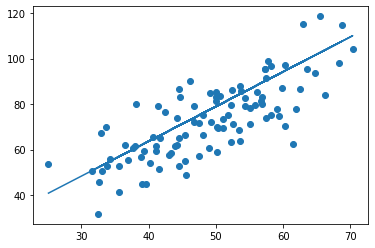

In [11]:
from matplotlib import pyplot as plt
from celluloid import Camera
import matplotlib.pyplot as plt
X = []
Y = []
line = []


for point in points:
    point = list(point)
    x,y = float(point[0]), float(point[1])
    X.append(x)
    Y.append(y)
    
    vals = (m*x) + b
    line.append(vals)
    
    

plt.scatter(X,Y)
plt.plot(X, line)

In [20]:
# svm.py
import numpy as np  # for handling multi-dimensional array operation
import pandas as pd  # for reading data from csv 
#import statsmodels.api as sm  # for finding the p-value
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.utils import shuffle


In [21]:
#SVM implementation

def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = reg_strength * (np.sum(distances) / N)
    
    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

In [22]:
# I haven't tested it but this same function should work for
# vanilla and mini-batch gradient descent as well
def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array
    
    #print('W in cost_gradient() ',W)
    #print('X_batch in cost_gradient() ',X_batch)
    #print('Y_batch in cost_gradient() ', Y_batch)
    
    #print('dot product of X and W: ', np.dot(X_batch, W))
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    
    #print('distance in cost_gradient() : ', distance)
    
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw

In [193]:
def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            #print('going in from sgd (): weights', weights)
            #print('going in from sgd (): x',x)
            #print('going in from sgd (): Y[ind]', Y[ind])
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)
        
        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is:{} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                print('final weights is : ', weights)
                return weights
            prev_cost = cost
            nth += 1

        
    return weights

In [50]:
def init():
    print("reading dataset...")
    # read data in pandas (pd) data frame
    data = pd.read_csv('data.csv')
    points = genfromtxt("data.csv", delimiter=",")

    # drop last column (extra column added by pd)
    # and unnecessary first column (id)
    data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

    print("applying feature engineering...")
    # convert categorical labels to numbers
    diag_map = {'M': 1.0, 'B': -1.0}
    data['diagnosis'] = data['diagnosis'].map(diag_map)

    # put features & outputs in different data frames
    Y = data.loc[:, 'diagnosis']
    X = data.iloc[:, 1:]

    # filter features
    #remove_correlated_features(X)
    #remove_less_significant_features(X, Y)

    # normalize data for better convergence and to prevent overflow
    X_normalized = MinMaxScaler().fit_transform(X.values)
    X = pd.DataFrame(X_normalized)

    # insert 1 in every row for intercept b
    X.insert(loc=len(X.columns), column='intercept', value=1)

    # split data into train and test set
    print("splitting dataset into train and test sets...")
    X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42)

    # train the model
    print("training started...")
    W = sgd(X_train.to_numpy(), y_train.to_numpy())
    print("training finished.")
    print("weights are: {}".format(W))
    
    return W

In [51]:
regularization_strength = 1000
learning_rate = 0.000001
W = init()

reading dataset...


NameError: name 'pd' is not defined

In [197]:
#svm implementation with simple points 
#using the functions created for SVM but the dataset is from regression (the point dataset)
points = genfromtxt("data.csv", delimiter=",")

X = []
Y = []

for point in points:
    point = list(point)
    x,y = float(point[0]), float(point[1])
    X.append(x)
    
    Y.append(y)


p = [X]
k = [Y]


X = np.asarray(p, dtype=np.float32)
Y = np.asarray(k, dtype=np.float32)
X = X.reshape(-1,1)
X = np.c_[ X, np.ones(100) ]
Y = Y.reshape(-1,1)

In [198]:
#these two parameters need to be tunned properly for a perfect hyper plane
regularization_strength = 10000 
learning_rate = 0.001
W = sgd(X,Y)

Epoch is:1 and Cost is: 3010475971.01676
Epoch is:2 and Cost is: 2464522629.8464293
Epoch is:4 and Cost is: 1651688331.5577433
Epoch is:8 and Cost is: 741854407.8883561
Epoch is:16 and Cost is: 149657967.5928064
Epoch is:32 and Cost is: 6090629.2830259325
Epoch is:64 and Cost is: 10087.575831867462
Epoch is:128 and Cost is: 0.027671716845976913
Epoch is:256 and Cost is: 27.201719986847866
Epoch is:512 and Cost is: 29866136.444772925
Epoch is:1024 and Cost is: 235581.9760527183
Epoch is:2048 and Cost is: 16.929252389572117
Epoch is:4096 and Cost is: 9190183.463513661
Epoch is:4999 and Cost is: 0.13300340286109272


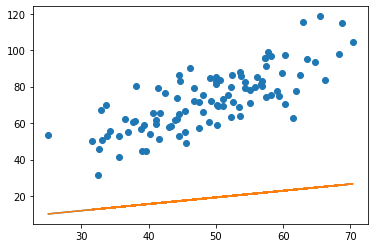

In [199]:
#plot points and the separating plane, this needs tuning 
X = []
Y = []
line = []


for point in points:
    point = list(point)
    x,y = float(point[0]), float(point[1])
    X.append(x)
    Y.append(y)
    
    vals = (W*x) + 1 
    line.append(vals)
    
    

plt.scatter(X,Y)
plt.plot(X, line)

Epoch is:1 and Cost is: 14.857704257495314
Epoch is:2 and Cost is: 14.854733012292625
final weights is :  [3.85418383 3.85418383]


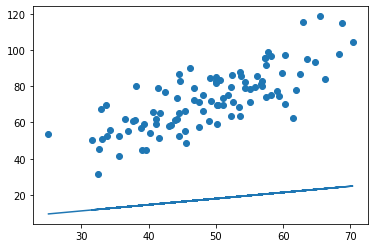

In [162]:
# K-means clustering implementation from scratch by me

import math
import numpy as np
import matplotlib.pyplot as plt

points = [[1,1],[2,1.5],[7,7],[8,8],[2,4],[3,2],[8,6],[8,3],[8,1],[8,-1]]

#points = [[ 32.50234527,  31.70700585],
#       [ 53.42680403,  68.77759598],
#       [ 61.53035803,  62.5623823 ]]



points_np = np.array(points)

centroids = np.array([[2,3],[1,1]])
#centroids = np.array([[40,120],[65,40]])

def calculate_distance(data, centroids,info_dict = {}):
    cluster_info = []
    for point in points_np:
        for ind,centroid in enumerate(centroids):
            cluster = 'cluster' + str(ind)
            distance = math.sqrt(((point[0] - centroid[0]) ** 2) + ((point[1] - centroid[1])**2))
            
            info_dict[distance] = [cluster, point]
            
        
        key_min = min([key for key,val in info_dict.items()])
        cluster_info.append(info_dict[key_min])
        info_dict = {}
        distance = []
    
    #print(cluster_info)
    return cluster_info
        
def new_position_for_centroids(cluster_info,centroids):
    new_coordinates = []
    for ind,centroid in enumerate(centroids):
        cluster = 'cluster' + str(ind)
        same_cluster_points = np.array([val[1] for val in cluster_info if val[0] == cluster])
        new_coordinates.append(np.mean(same_cluster_points, axis=0))
    
    return new_coordinates
        
        
#print('centroid', centroids, '\n')
#cluster_info = calculate_distance(points_np, centroids)
#new_coordinates = new_position_for_centroids(cluster_info,centroids)        
#new_centroids = np.array(new_coordinates)
#print('centroid', new_centroids, '\n')

#cluster_info = calculate_distance(points_np, new_centroids)
#new_coordinates = new_position_for_centroids(cluster_info,new_centroids)        
#new_centroids = np.array(new_coordinates)
#print('centroid', new_centroids, '\n')

#cluster_info = calculate_distance(points_np, new_centroids)
#new_coordinates = new_position_for_centroids(cluster_info,new_centroids)        
#new_centroids = np.array(new_coordinates)
#print('centroid', new_centroids, '\n')

#cluster_info = calculate_distance(points_np, new_centroids)
#new_coordinates = new_position_for_centroids(cluster_info,new_centroids)        
#new_centroids = np.array(new_coordinates)
#print('centroid', new_centroids, '\n')

new_centroids = centroids
print('new centroid value: ', new_centroids, '\n')
change = 10
#change = a very big value
while change > 0:
    old_centroids = new_centroids
    print('old_centroids', old_centroids)
    print('new_centroids', new_centroids)
    cluster_info = calculate_distance(points_np, new_centroids)
    new_coordinates = new_position_for_centroids(cluster_info,new_centroids)        
    new_centroids = np.array(new_coordinates)
    #print('new centroid value: ', new_centroids, '\n')
    change -= 1
     
    
    
    

            
    


new centroid value:  [[2 3]
 [1 1]] 

old_centroids [[2 3]
 [1 1]]
new_centroids [[2 3]
 [1 1]]
old_centroids [[6.5  3.75]
 [1.5  1.25]]
new_centroids [[6.5  3.75]
 [1.5  1.25]]
old_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
new_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
old_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
new_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
old_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
new_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
old_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
new_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
old_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
new_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
old_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
new_centroids [[7.83333333 4.        ]
 [2.         2.125     ]]
old_centroids [[7.83333333 4.        ]
 [2

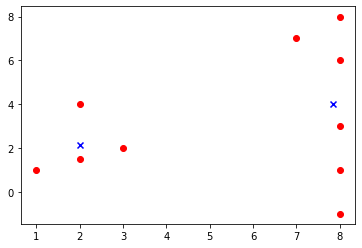

In [163]:
x_cord = []
y_cord = []
for val in points_np:
    x_cord.append(val[0])
    y_cord.append(val[1])

centroid_x = []
centroid_y = []
for val in new_centroids:
    centroid_x.append(val[0])
    centroid_y.append(val[1])

plt.scatter(x_cord,y_cord,color='red')
plt.scatter(centroid_x,centroid_y,color='blue',marker='x')

In [1]:
points = genfromtxt("data.csv", delimiter=",")


NameError: name 'genfromtxt' is not defined

In [148]:
points = [[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167]]
       
points_np = np.array(points)

In [149]:
points_np

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167]])

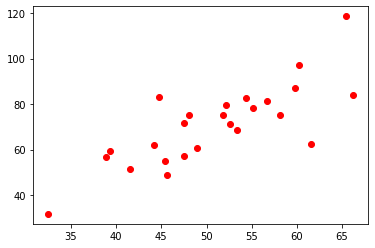

In [150]:
x_cord = []
y_cord = []
for val in points_np:
    x_cord.append(val[0])
    y_cord.append(val[1])


plt.scatter(x_cord,y_cord,color='red')


In [ ]:
points = [[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167]]

In [39]:
# a simple Neural net implementation from Siraj Raval's
import numpy as np

#input data
input_data = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
#output label
output_labels = np.array([[0],
                         [1],
                         [1],
                         [0]])

#sigmoid function
def sigmoid_function(x, deriv=False):
    if deriv == True:
        return (x*(1-x))
    return 1/(1 + np.exp(-x))

#weight values
weight_0 = 2*np.random.random((3,4)) - 1
weight_1 = 2*np.random.random((4,1)) - 1


for j in range(60000):
    layer0 = input_data
    layer1 = sigmoid_function(np.dot(layer0, weight_0))
    layer2 = sigmoid_function(np.dot(layer1,weight_1))
    
    #calculate error for layer2 and then plug that in to calculate layer2 gradient
    layer2_error = output_labels - layer2
    layer2_gradient = layer2_error*sigmoid_function(layer2, deriv=True)
    
    if j%10000 == 0:
        print("error: ", np.mean((np.abs(layer2_error))))
        print(layer2)
    
    #calculate error for layer1 from layer2_gradient and then plug that in to calculate layer1 gradient
    layer1_error = layer2_gradient.dot(weight_1.T)
    layer1_gradient = layer1_error*sigmoid_function(layer1,deriv=True)
    
    #update the weights using the gradients
    weight_1 += layer1.T.dot(layer2_gradient)
    weight_0 += layer0.T.dot(layer1_gradient)
    
    
    
    
    

error:  0.5000248718371418
[[0.68357052]
 [0.74959153]
 [0.68585479]
 [0.75197529]]
error:  0.010755836886514904
[[0.00507758]
 [0.98988191]
 [0.98642377]
 [0.01425144]]
error:  0.00740596042416033
[[0.00342715]
 [0.99285496]
 [0.99082106]
 [0.00987271]]
error:  0.005986322442960977
[[0.00273166]
 [0.99417306]
 [0.99262187]
 [0.00800857]]
error:  0.00515432175449621
[[0.00232635]
 [0.99495889]
 [0.99366321]
 [0.00691304]]
error:  0.004591988543550378
[[0.00205392]
 [0.99549504]
 [0.99436197]
 [0.00617104]]


In [123]:
#neural net implementation from scratch by me (this is a single perceptron)
import math
# test predictions
#dataset = [[70,5.5,1],
#          [80,6.0,1],
#          [65,5.8,1],
#          [55,5.2,0],
#          [58,5.4,0]]
#normalized
#dataset = [[0.6,0.37499999999999983,1],
#           [1.0,1.0,1],
#           [0.4,0.749999999999999,1],
#           [0.0,0.0,0],
#           [0.12,0.2500000000000003,0]]

dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

#and or dataset
#dataset = [[1,1,1],
#          [1,0,0],
#           [0,1,0],
#           [0,0,0]]

def predict(row, weights, bias):
    activation = bias
    for i in range(len(row)-1):
        activation += weights[i] * row[i]
    #print(activation)
    #return 1.0 if activation >= 0.0 else 0.0
    return 1/(1+math.exp(-activation))

    

weights = [0.0,0.0]
bias = 0.0
l_rate = 0.1
def model_fit(dataset,weights, bias, l_rate):
    for row in dataset:
        predicted_val = predict(row, weights, bias)
        actual_val = row[2]
        error = actual_val - predicted_val
        bias += l_rate*error
        weights[0] += error*row[0]*l_rate
        weights[1] += error*row[1]*l_rate
        
        print('Predicted: ', predicted_val, 'actual: ', actual_val)
        #print(weights, bias)
    


    

for i in range(5):
    print('------------------------')
    model_fit(dataset,weights, bias, l_rate)
    

#predicted_val_after_training = predict([65,5.8,1], weights, bias)
##print('predicted value after training: ', predicted_val_after_training)

------------------------
Predicted:  0.5 actual:  0
Predicted:  0.3647012597052078 actual:  0
Predicted:  0.15702417641242866 actual:  0
Predicted:  0.2755599316451808 actual:  0
Predicted:  0.11886561466626712 actual:  0
Predicted:  0.02644810419236609 actual:  1
Predicted:  0.8803543538817346 actual:  1
Predicted:  0.9607161408711548 actual:  1
Predicted:  0.9883346490650736 actual:  1
Predicted:  0.9769076284278804 actual:  1
------------------------
Predicted:  0.7938882574772216 actual:  0
Predicted:  0.44205469411009773 actual:  0
Predicted:  0.29409958374883793 actual:  0
Predicted:  0.2978564205632735 actual:  0
Predicted:  0.1833785150529321 actual:  0
Predicted:  0.19217132561024045 actual:  1
Predicted:  0.9352730053373742 actual:  1
Predicted:  0.9842352380476049 actual:  1
Predicted:  0.998012703378477 actual:  1
Predicted:  0.9841683390086655 actual:  1
------------------------
Predicted:  0.7528797003540071 actual:  0
Predicted:  0.3502000546175905 actual:  0
Predicted: 

In [1207]:
#neural network implementation from scratch (one i/p layer, one hidden layer, one o/p layer)

#a basic matrix implementation without numpy
class Matrix:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.matrix = []
        self.line = []
    
    def generate_matrix(self):
        for i in range(self.rows):
            for j in range(self.cols):
                self.line.append(random.uniform(-1,1))
            self.matrix.append(self.line)
            self.line = []
    
    def from_list(self, inputs):
        m = Matrix(len(inputs),1)
        for i in range(len(inputs)):
            m.matrix.append([inputs[i]])
        return m
    
    def substract(self,b):
        if isinstance(b,Matrix):
            result = Matrix(self.rows, self.cols)
            for i in range(result.rows):
                for j in range(result.cols):
                    result.line.append(self.matrix[i][j] - b.matrix[i][j])
                result.matrix.append(result.line)
                result.line = []
                    #result.matrix[i][j] = self.matrix[i][j] - b.matrix[i][j]
            return result
            
        else:
            for i in range(self.rows):
                for j in range(self.cols):
                    self.matrix[i][j] -= m
        
    
    def add(self,m):
        if isinstance(m,Matrix):
            for i in range(self.rows):
                for j in range(self.cols):
                    self.matrix[i][j] += m.matrix[i][j]
            
        else:
            for i in range(self.rows):
                for j in range(self.cols):
                    self.matrix[i][j] += m
    
    def maps(self,func):
        for i in range(self.rows):
            for j in range(self.cols):
                val = self.matrix[i][j]
                self.matrix[i][j] = func(val)
    
    def transpose(self):
        matrix_transposed = Matrix(self.cols, self.rows)
        for j in range(self.cols):
            for i in range(self.rows):
                matrix_transposed.line.append(self.matrix[i][j])
            matrix_transposed.matrix.append(matrix_transposed.line)
            matrix_transposed.line = []
        return matrix_transposed
        
    
    def multiply(self, m):
        if isinstance(m,Matrix):
            #multiplication of two matrices
            if self.cols != m.rows:
                print('Shapes don\'t match')
                return None
            a = self
            b = m
            result = Matrix(a.rows, b.cols)
            for i in range(result.rows):
                for j in range(result.cols):
                    sum = 0
                    for k in range(a.cols):
                        sum += a.matrix[i][k] * b.matrix[k][j]
                    result.line.append(sum)
                result.matrix.append(result.line)
                result.line = []
            return result
                    
            
        else:
            #element wise multiplication with a single value
            for i in range(self.rows):
                for j in range(self.cols):
                    self.matrix[i][j] *= m
    
    def hadaramrd_multiplication(self,b):
        result = Matrix(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result.line.append(self.matrix[i][j] * b.matrix[i][j])
            result.matrix.append(result.line)
            result.line = []
        return result
        
    
            
                

In [1375]:
import math
def sigmoid(val):
    return 1/(1+math.exp(-val))

def dsigmoid(val):
    return val*(1-val)

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = 0.1
        
        
        self.weights_ih = Matrix(self.hidden_nodes, self.input_nodes)
        self.weights_ih.generate_matrix()
        self.weights_ho = Matrix(self.output_nodes, self.hidden_nodes)
        self.weights_ho.generate_matrix()
        
        self.bias_h = Matrix(self.hidden_nodes, 1)
        self.bias_h.generate_matrix()
        self.bias_o = Matrix(self.output_nodes, 1)
        self.bias_o.generate_matrix()
        
        
    def feed_forward(self, inputs):
        #generating hidden outputs
        inputs = Matrix.from_list(inputs, inputs)
        #print('1st matrix: ', self.weights_ih.matrix)
        #print('2nd matrix: ', inputs.matrix)
        hidden = self.weights_ih.multiply(inputs)
        #print('result matrix:, ', hidden.matrix)
        
        
        #print('bias:, ', self.bias_h.matrix)
        hidden.add(self.bias_h)
        #print('result matrix after adding bias:, ', hidden.matrix)
        
         
        #activation function
        hidden.maps(sigmoid)
        #print('final hidden output: ', hidden.matrix)
        
        
        #generating output's output
        outputs = self.weights_ho.multiply(hidden)
        #print('outputs output after multiplying with hidden and adding bias: ', outputs.matrix)
        outputs.add(self.bias_o)
        outputs.maps(sigmoid)
        #print('outputs output after multiplying with hidden, adding bias, passing through activation: ', outputs.matrix)

        return outputs, hidden, inputs
    
    def train(self, inputs, labels):
        predicted_vals, saved_hidden, inputs_saved = self.feed_forward(inputs)
        labels = Matrix.from_list(labels, labels)
        
                
        #output layer error
        op_errors = labels.substract(predicted_vals)
        
        #hidden layer error
        weights_ho_T = self.weights_ho.transpose()
        hidden_errors = weights_ho_T.multiply(op_errors)
        
        #adjust the weights of hidden > output
        
        #calculate gradients
        predicted_vals.maps(dsigmoid)
        gradients = op_errors.hadaramrd_multiplication(predicted_vals)
        gradients.multiply(self.learning_rate)
        #adjust the biases for outputs layer which is just the gradient of hidden > output layer
        self.bias_o.add(gradients)
        
        #calculate deltas for hidden > outputs layer
        saved_hidden_T = saved_hidden.transpose()
        weights_ho_deltas = gradients.multiply(saved_hidden_T)
        self.weights_ho.add(weights_ho_deltas)
        
        
        #adjust the weights of input > hidden
        
        #calculate gradients
        saved_hidden.maps(dsigmoid)
        gradients = hidden_errors.hadaramrd_multiplication(saved_hidden)
        gradients.multiply(self.learning_rate)
        #adjust the biases for hidden layer which is also just the gradient of input > hidden layer
        self.bias_h.add(gradients)
        
        
        #calculate deltas for input > hidden layer
        inputs_T =  inputs_saved.transpose()
        weights_ih_deltas = gradients.multiply(inputs_T)
        self.weights_ih.add(weights_ih_deltas)
        
        
        
        
        
        
        
        
        
        

In [1376]:
nn = NeuralNetwork(2,2,1)

In [1370]:
inputs = [0,1]
labels = [1]
#print(nn.feed_forward(inputs))
nn.train(inputs,labels)

final hidden output:  [[0.7156205911837145], [0.2295421820846808]]
outputs output after multiplying with hidden, adding bias, passing through activation:  [[0.48874438063432685]]


In [1421]:
#XOR dataset
X_train = [[0,1], [1,0], [0,0], [1,1]]
y_train = [[1],[1],[0],[0]]


for i in range(50000):
    r = list(range(4))
    random.shuffle(r)
    for i in r:
        nn.train(X_train[i],y_train[i])


In [1422]:
outputs, hidden, inputs = nn.feed_forward([1,0])
print(outputs.matrix)

outputs, hidden, inputs = nn.feed_forward([0,1])
print(outputs.matrix)

outputs, hidden, inputs = nn.feed_forward([1,1])
print(outputs.matrix)

outputs, hidden, inputs = nn.feed_forward([0,0])
print(outputs.matrix)

[[0.993370939561317]]
[[0.9933680844518403]]
[[0.0073869098547333254]]
[[0.007438401190990193]]
